In [105]:
import torch
from collections import deque
import random
import copy
from torch.autograd import Variable
import pymysql
import datetime
import os
import sys
import time
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [362]:
plt.rcParams['text.color'] = "#ababab"
plt.rcParams['axes.labelcolor'] = "#ababab"
plt.rcParams['xtick.color'] = "#ababab"
plt.rcParams['ytick.color'] = "#ababab"
plt.rcParams['figure.facecolor'] = "#3c3f41"
plt.rcParams['axes.facecolor'] = "#2b2b2b"
plt.rcParams["figure.figsize"] = (25,8)

In [191]:
mysql_connection = pymysql.connect(host='localhost',
                    user='root',
                    password='qazxcdewS1',
                    db='binance',
                    charset='utf8',
                    cursorclass=pymysql.cursors.DictCursor)
                    
sql = "select open_time, open, high, low, close, volume, numberOfTrades, takerBuyVolume from f_btcusdt_5m where openTime >= 1569398400000 order by openTime"
df = pd.read_sql(sql, mysql_connection, parse_dates=["open_time"], index_col="open_time")

df["takerSellVolume"] = df.volume - df.takerBuyVolume
df["weekday"] = pd.DatetimeIndex(df.index).to_series().dt.dayofweek
df["month"] = pd.DatetimeIndex(df.index).to_series().dt.month
df["day"] = pd.DatetimeIndex(df.index).to_series().dt.day
df["hour"] = pd.DatetimeIndex(df.index).to_series().dt.hour

df["close_pct_10m"] = df.close.pct_change(periods=10)
df["close_pct_15m"] = df.close.pct_change(periods=15)
df["close_pct_30m"] = df.close.pct_change(periods=30)
df["close_pct_1h"] = df.close.pct_change(periods=60)
df["close_pct_4h"] = df.close.pct_change(periods=240)

lb = LabelBinarizer()
df["weekday_oh"] = lb.fit_transform(df.weekday).tolist()
df["month_oh"] = lb.fit_transform(df.month).tolist()
df["day_oh"] = lb.fit_transform(df.day).tolist()
df["hour_oh"] = lb.fit_transform(df.hour).tolist()

df.dropna(inplace=True)
df

C:\Users\PiviN\anaconda3\envs\nn_gpu\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,open,high,low,close,volume,numberOfTrades,takerBuyVolume,takerSellVolume,weekday,month,...,hour,close_pct_10m,close_pct_15m,close_pct_30m,close_pct_1h,close_pct_4h,weekday_oh,month_oh,day_oh,hour_oh
open_time,,,,,,,,,,,,,,,,,,,,,
2019-09-26 07:00:00,8361.82,8362.79,8343.01,8352.19,51.919,146,36.782,15.137,3,9,...,7,0.000429,-0.003458,-0.001802,-0.004962,0.007397,"[0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
2019-09-26 07:05:00,8351.37,8351.58,8335.72,8343.00,79.182,143,62.164,17.018,3,9,...,7,-0.002161,-0.003603,-0.002939,-0.005704,-0.003215,"[0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
2019-09-26 07:10:00,8343.01,8361.68,8340.52,8347.36,80.233,129,39.347,40.886,3,9,...,7,-0.003061,-0.002103,-0.003071,-0.003553,-0.001072,"[0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
2019-09-26 07:15:00,8345.51,8364.62,8343.48,8363.47,74.253,113,22.298,51.955,3,9,...,7,-0.001615,-0.000644,0.000760,-0.004179,0.004184,"[0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
2019-09-26 07:20:00,8359.40,8368.71,8355.97,8368.71,47.843,112,14.197,33.646,3,9,...,7,-0.000026,0.001042,0.000999,-0.005597,0.005743,"[0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-25 12:35:00,36367.65,36417.58,36334.24,36372.23,1000.015,10402,559.176,440.839,1,1,...,12,0.003532,0.001449,0.017618,0.006124,0.089355,"[0, 1, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
2022-01-25 12:40:00,36372.24,36373.59,36259.34,36289.83,914.804,10409,318.757,596.047,1,1,...,12,0.003367,0.003488,0.016191,0.002870,0.088769,"[0, 1, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
2022-01-25 12:45:00,36289.84,36386.52,36282.48,36312.99,711.742,8527,408.354,303.388,1,1,...,12,0.007036,0.006698,0.016106,0.007016,0.086980,"[0, 1, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."


In [281]:
df.to_pickle("df.pkl")

In [282]:
print(pd.__version__)

1.4.1


In [192]:
df_train = df[:140000].copy(deep=True)
df_val = df[(len(df) - 100000) : len(df) - 50000].copy(deep=True)
df_test = df[len(df) - 50000:].copy(deep=True)

In [193]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_train[['close']])
scalerVolume = MinMaxScaler()
scalerVolume.fit(df_train[['volume']])

MinMaxScaler()

In [194]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

df_train["open_t"] = scaler.transform(df_train[['open']])
df_train["high_t"] = scaler.transform(df_train[['high']])
df_train["low_t"] = scaler.transform(df_train[['low']])
df_train["close_t"] = scaler.transform(df_train[['close']])
df_train["volume_t"] = scalerVolume.transform(df_train[['volume']])
df_train["takerBuyVolume_t"] = scalerVolume.transform(df_train[['takerBuyVolume']])
df_train["takerSellVolume_t"] = scalerVolume.transform(df_train[['takerSellVolume']])

df_val["open_t"] = scaler.transform(df_val[['open']])
df_val["high_t"] = scaler.transform(df_val[['high']])
df_val["low_t"] = scaler.transform(df_val[['low']])
df_val["close_t"] = scaler.transform(df_val[['close']])
df_val["volume_t"] = scalerVolume.transform(df_val[['volume']])
df_val["takerBuyVolume_t"] = scalerVolume.transform(df_val[['takerBuyVolume']])
df_val["takerSellVolume_t"] = scalerVolume.transform(df_val[['takerSellVolume']])

df_test["open_t"] = scaler.transform(df_test[['open']])
df_test["high_t"] = scaler.transform(df_test[['high']])
df_test["low_t"] = scaler.transform(df_test[['low']])
df_test["close_t"] = scaler.transform(df_test[['close']])
df_test["volume_t"] = scalerVolume.transform(df_test[['volume']])
df_test["takerBuyVolume_t"] = scalerVolume.transform(df_test[['takerBuyVolume']])
df_test["takerSellVolume_t"] = scalerVolume.transform(df_test[['takerSellVolume']])

df_test.tail()

,open,high,low,close,volume,numberOfTrades,takerBuyVolume,takerSellVolume,weekday,month,...,month_oh,day_oh,hour_oh,open_t,high_t,low_t,close_t,volume_t,takerBuyVolume_t,takerSellVolume_t
open_time,,,,,,,,,,,,,,,,,,,,,
2022-01-25 12:35:00,36367.65,36417.58,36334.24,36372.23,1000.015,10402,559.176,440.839,1,1,...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0.851713,0.853017,0.850840,0.851832,0.018727,0.010448,0.008225
2022-01-25 12:40:00,36372.24,36373.59,36259.34,36289.83,914.804,10409,318.757,596.047,1,1,...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0.851833,0.851868,0.848884,0.849680,0.017126,0.005933,0.011140
2022-01-25 12:45:00,36289.84,36386.52,36282.48,36312.99,711.742,8527,408.354,303.388,1,1,...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0.849680,0.852206,0.849488,0.850285,0.013313,0.007615,0.005644
2022-01-25 12:50:00,36313.00,36488.27,36307.38,36458.90,1067.033,12289,713.442,353.591,1,1,...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0.850285,0.854863,0.850138,0.854096,0.019985,0.013345,0.006587
2022-01-25 12:55:00,36458.90,36500.00,36362.31,36389.86,1439.384,14314,650.455,788.929,1,1,...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0.854096,0.855170,0.851573,0.852293,0.026978,0.012162,0.014762


In [195]:
df_train.columns

Index(['open', 'high', 'low', 'close', 'volume', 'numberOfTrades',
       'takerBuyVolume', 'takerSellVolume', 'weekday', 'month', 'day', 'hour',
       'close_pct_10m', 'close_pct_15m', 'close_pct_30m', 'close_pct_1h',
       'close_pct_4h', 'weekday_oh', 'month_oh', 'day_oh', 'hour_oh', 'open_t',
       'high_t', 'low_t', 'close_t', 'volume_t', 'takerBuyVolume_t',
       'takerSellVolume_t'],
      dtype='object')

In [196]:
df_train['data'] = [[df_train["close_pct_10m"][i]] + 
              [df_train["close_pct_15m"][i]] + 
              [df_train["close_pct_30m"][i]] + 
              [df_train["close_pct_1h"][i]] + 
              [df_train["close_pct_4h"][i]] + 
              [df_train["open_t"][i]] + 
              [df_train["high_t"][i]] + 
              [df_train["low_t"][i]] + 
              [df_train["close_t"][i]] + 
              [df_train["volume_t"][i]] + 
              [df_train["takerBuyVolume_t"][i]] + 
              [df_train["takerSellVolume_t"][i]] + 
              df_train["weekday_oh"][i] + 
              df_train["month_oh"][i] + 
              df_train["day_oh"][i] + 
              df_train["hour_oh"][i] for i in range(len(df_train))]

df_val['data'] = [[df_val["close_pct_10m"][i]] + 
              [df_val["close_pct_15m"][i]] + 
              [df_val["close_pct_30m"][i]] + 
              [df_val["close_pct_1h"][i]] + 
              [df_val["close_pct_4h"][i]] + 
              [df_val["open_t"][i]] + 
              [df_val["high_t"][i]] + 
              [df_val["low_t"][i]] + 
              [df_val["close_t"][i]] + 
              [df_val["volume_t"][i]] + 
              [df_val["takerBuyVolume_t"][i]] + 
              [df_val["takerSellVolume_t"][i]] + 
              df_val["weekday_oh"][i] + 
              df_val["month_oh"][i] + 
              df_val["day_oh"][i] + 
              df_val["hour_oh"][i] for i in range(len(df_val))]

df_test['data'] = [[df_test["close_pct_10m"][i]] + 
              [df_test["close_pct_15m"][i]] + 
              [df_test["close_pct_30m"][i]] + 
              [df_test["close_pct_1h"][i]] + 
              [df_test["close_pct_4h"][i]] + 
              [df_test["open_t"][i]] + 
              [df_test["high_t"][i]] + 
              [df_test["low_t"][i]] + 
              [df_test["close_t"][i]] + 
              [df_test["volume_t"][i]] + 
              [df_test["takerBuyVolume_t"][i]] + 
              [df_test["takerSellVolume_t"][i]] + 
              df_test["weekday_oh"][i] + 
              df_test["month_oh"][i] + 
              df_test["day_oh"][i] + 
              df_test["hour_oh"][i] for i in range(len(df_test))]

len(df_test['data'][0])

86

# DQN

In [310]:
# -----------------------
class DQN():
    def __init__(self, n_state, n_action, n_hidden=50, lr=0.05):
        self.criterion = torch.nn.MSELoss()
        self.model = torch.nn.Sequential(
                        torch.nn.Linear(n_state, n_hidden),
                        torch.nn.ReLU(),
                        torch.nn.Linear(n_hidden, n_hidden // 2),
                        torch.nn.ReLU(),
                        torch.nn.Linear(n_hidden // 2, n_action)
                )


        self.model_target = copy.deepcopy(self.model)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr)

    def update(self, s, y):
        """
        Обновляет веса DQN, получив обучающий пример
        @param s: состояние
        @param y: целевое значение
        """
        y_pred = self.model(torch.Tensor(s))
        loss = self.criterion(y_pred, Variable(torch.Tensor(y)))
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()


    def predict(self, s):
        """
        Вычисляет значения Q-функции состояния для всех действий, применяя обученную модель
        @param s: входное состояние
        @return: значения Q для всех действий
        """
        with torch.no_grad():
            return self.model(torch.Tensor(s))

    def target_predict(self, s):
        """
        Вычисляет значения Q-функции состояния для всех действий с помощью целевой сети
        @param s: входное состояние
        @return: целевые ценности состояния для всех действий
        """
        with torch.no_grad():
            return self.model_target(torch.Tensor(s))

    def replay(self, memory, replay_size, gamma):
        """
        Буфер воспроизведения совместно с целевой сетью
        @param memory: буфер воспроизведения опыта
        @param replay_size: сколько примеров использовать при каждом обновлении модели
        @param gamma: коэффициент обесценивания
        """
        if len(memory) >= replay_size:
            replay_data = random.sample(memory, replay_size)
            states = []
            td_targets = []
            for state, action, next_state, reward in replay_data:
                states.append(state)
                q_values = self.predict(state).tolist()
                q_values_next = self.target_predict(next_state).detach()
                q_values[action] = reward + gamma * torch.max(q_values_next).item()
                td_targets.append(q_values)

            self.update(states, td_targets)

    def copy_target(self):
        """
        Синхронизирует веса
        """
        self.model_target.load_state_dict(self.model.state_dict())

In [358]:
# -----------------------
def q_learning(data, estimator, epochs, replay_size, target_update=1000, gamma=1.0, epsilon=0.1, epsilon_decay=.99):
    """
    Глубокое Q-обучение методом Double DQN с воспроизведением опыта
    @param data: датафрэйм
    @param estimator: DQN объект
    @param replay_size: сколько примеров использовать при каждом обновлении модели
    @param target_update: через сколько эпизодов обновлять целевую сеть
    @param epochs: количество эпох
    @param gamma: коэффициент обесценивания
    @param epsilon: параметр ε-жадной стратегии
    @param epsilon_decay: коэффициент затухания ε
    
    action == 0 - hold; 1 - buy; 2 - sell
    """
    for epoch in range(epochs):
        
        for i in range(window, len(data) - 1):
            
            price = data.close[i]
            next_price = data.close[i + 1]
            state = []
            next_state = []
            action = 0
            reward = 0.0
            
            for j in range(window):
                state += data.data[i - j]
                next_state += data.data[i - j + 1]
                
            if random.random() < epsilon:
                action = random.randint(0, n_action - 1)
            else:
                q_values = estimator.predict(state)
                action = torch.argmax(q_values).item()
            
            if (action == 1 and next_price > price) or (action == 2 and next_price <= price):
                reward = 1.0
            elif action == 0:
                reward = -0.01
            elif (action == 1 and next_price <= price) or (action == 2 and next_price > price):
                reward = -1.0
            
            total_reward_epoch[epoch] += reward
            actions[epoch].append(action)
            if next_price > price:
                directions[epoch].append(1)
            else:
                directions[epoch].append(2)
            
            memory.append((state, action, next_state, reward))
            estimator.replay(memory, replay_size, gamma)

            if (i + window) % target_update == 0:
                estimator.copy_target()
            
            epsilon = max(epsilon - epsilon_decay, 0.01)
            print(f"{i - window} / {len(data)} | ε: {epsilon} reward: {total_reward_epoch}                                       ", end='\r')
                  
        print(f'Epoch: {epoch}, total reward: {total_reward_epoch[epoch]}, epsilon: {epsilon}')
        estimator.copy_target()
        

In [359]:
window = 10
n_state = len(df_test['data'][0]) * window # размер входного слоя
n_action = 3 # размер выходного слоя - количество действий
n_hidden = 256 # размер скрытого слоя
lr = 0.01 # скорость обучения
memory = deque(maxlen=10000) # буфер для хранения опыта
epochs = 10 # количество эпох
replay_size = 20 # размер выборки из буфера воспроизведения на каждом шаге
target_update = 1000 # после какого количества шагов обновляется целевая сеть
total_reward_epoch = [0] * epochs # будем запоминать полные вознаграждения в каждой эпохе
actions = [[0]] * epochs
directions = [[0]] * epochs

In [360]:
dqn = DQN(n_state, n_action, n_hidden, lr) # экземпляр DQN
q_learning(df_train, dqn, epochs, replay_size, target_update, gamma=1.0, epsilon=1.0, epsilon_decay=.000003) # обучение

Epoch: 0, total reward: 22.220000000037224, epsilon: 0.5800330000034655 0, 0, 0, 0, 0, 0, 0, 0]                                          
Epoch: 1, total reward: 112.82000000011107, epsilon: 0.160066000006098892.82000000011107, 0, 0, 0, 0, 0, 0, 0, 0]                                           
Epoch: 2, total reward: 384.8200000000111, epsilon: 0.0112.82000000011107, 384.8200000000111, 0, 0, 0, 0, 0, 0, 0]                                                        
Epoch: 3, total reward: 553.2200000001144, epsilon: 0.0112.82000000011107, 384.8200000000111, 553.2200000001144, 0, 0, 0, 0, 0, 0]                                           
Epoch: 4, total reward: 683.6400000001175, epsilon: 0.0112.82000000011107, 384.8200000000111, 553.2200000001144, 683.6400000001175, 0, 0, 0, 0, 0]                                          
Epoch: 5, total reward: -297.39999999981967, epsilon: 0.01.82000000011107, 384.8200000000111, 553.2200000001144, 683.6400000001175, -297.39999999981967, 0, 0, 0, 0]       

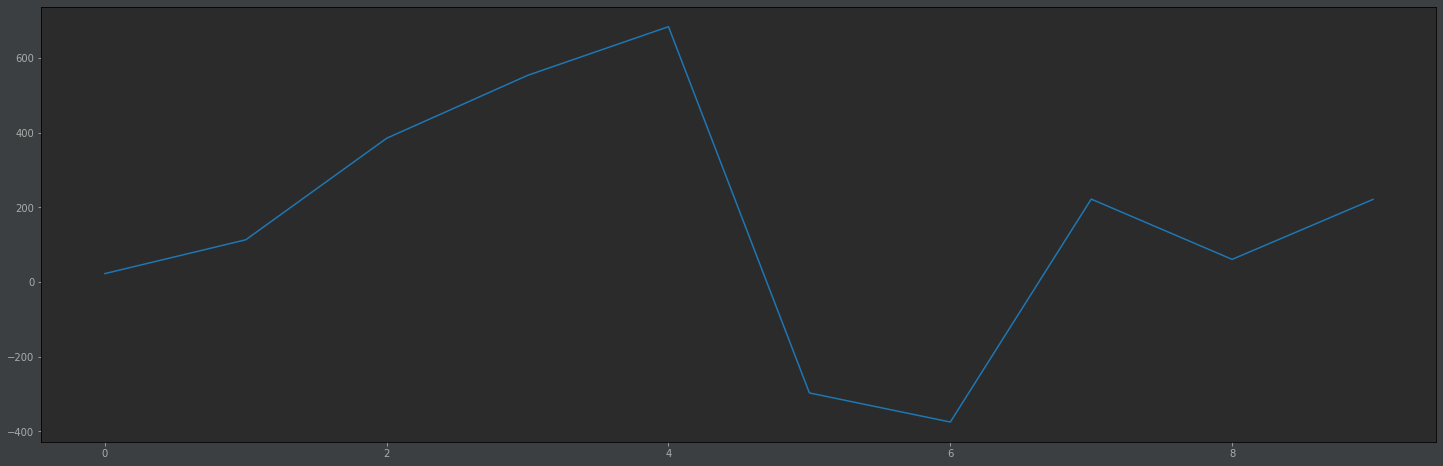

In [363]:
plt.plot(total_reward_epoch)